# **Análise Explorária de Dados**

Para esta análise, foi utilizada a base de vendas Adventure Works da Microsoft.

## **Comandos Iniciais**

In [4]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [5]:
# Upload do arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [6]:
# Criando nosso DataFrame
df = pd.read_excel("AdventureWorks.xlsx")

In [ ]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
# Quantidade de linhas e colunas
df.shape

(904, 16)

In [ ]:
# Consultar tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

## **Análise de Receita, Custo e Lucro**

In [8]:
# Qual a receita total?
round(df["Valor Venda"].sum(), 2)

5984606.14

In [9]:
# Qual o custo total?
df["Custo Total"] = df["Custo Unitário"].mul(df["Quantidade"])

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [10]:
# Então, o Custo total será:
round(df["Custo Total"].sum(), 2)

2486783.05

In [11]:
# Agora que temos a receita e o custo total, podemos calcular o lucro total
# Primeiramente, temos que criar uma coluna para o lucro
df["Lucro Total"] = df["Valor Venda"] - df["Custo Total"]

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro Total
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [12]:
# Total de custo
round(df["Lucro Total"].sum(), 2)

3497823.09

## **Análise do Tempo de Envio**

In [13]:
# Quanto tempo levou o envio de cada produto?
# Primeiramente, vamos criar uma coluna pra receber o total de dias
df["Tempo Envio"] = df['Data Envio'] - df['Data Venda']

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro Total,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [14]:
# Agora vamos descobrir qual a média do tempo de envio para cada marca. Por isso precisamos antes transformar a coluna Tempo Envio em valor numérico

# Extraindo apenas os dia
df["Tempo Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [15]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro Total,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [16]:
# Verificando o tipo da coluna Tempo Envio
df["Tempo Envio"].dtype

dtype('int64')

In [18]:
# Média do tempo de envio por marca
round(df.groupby("Marca")["Tempo Envio"].mean(), 2)

Marca
Adventure Works    8.66
Contoso            8.47
Fabrikam           8.51
Name: Tempo Envio, dtype: float64

## **Missing Values (Valores Nulos)**

In [19]:
# Verificando se temos dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo Total       0
Lucro Total       0
Tempo Envio       0
dtype: int64

## **Lucro por Ano e por Marca**

In [21]:
# Agrupando por ano e por marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro Total"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro Total, dtype: float64

In [26]:
# Retirar a notação científica dos valores muito grandes
# Configurar formato de display dos valores do tipo float:
pd.options.display.float_format = '{:20,.2f}'.format

In [27]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro Total"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro Total, dtype: float64

In [30]:
# Como reconfigurar os dados de lucro por marca/ano em forma de tabela e armazenar numa variável?
# Método reset_index(): reseta o index, ou seja, faz a formatação do conjunto de dados em formato tabelar
Lucro_Ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro Total"].sum().reset_index()
Lucro_Ano

,Data Venda,Marca,Lucro Total
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


## **Total de Produtos Vendidos**

In [31]:
# Agrupando por produto/quantidade e configurando a exibição do maior para o menor
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

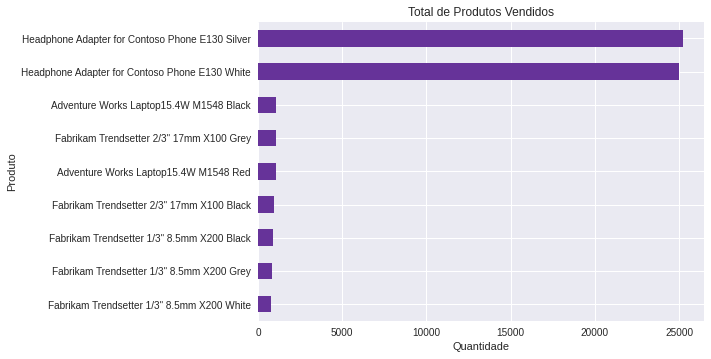

In [63]:
# Exibindo em forma de gráfico
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de Produtos Vendidos", color = "rebeccapurple")
plt.xlabel("Quantidade")
plt.ylabel("Produto");

## **Lucro Total por Ano**

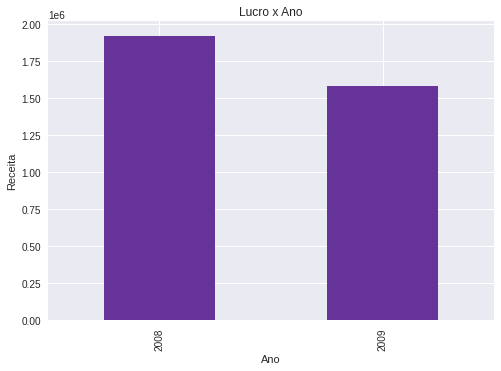

In [62]:
df.groupby(df["Data Venda"].dt.year)["Lucro Total"].sum().plot.bar(title = "Lucro x Ano", color = "rebeccapurple")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [39]:
# Dados numéricos do lucro por ano
df.groupby(df["Data Venda"].dt.year)["Lucro Total"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro Total, dtype: float64

## **Análise das Vendas de 2009**

In [40]:
# Selecionando apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [41]:
df_2009.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro Total,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


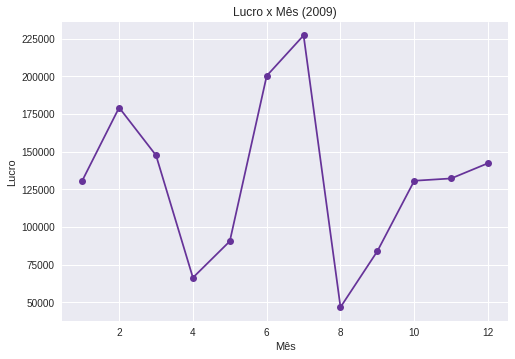

In [61]:
# Gráfico de linhas do lucro por mês em 2009
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro Total"].sum().plot(title = "Lucro x Mês (2009)", marker = "o", color = "rebeccapurple")
plt.xlabel("Mês")
plt.ylabel("Lucro");

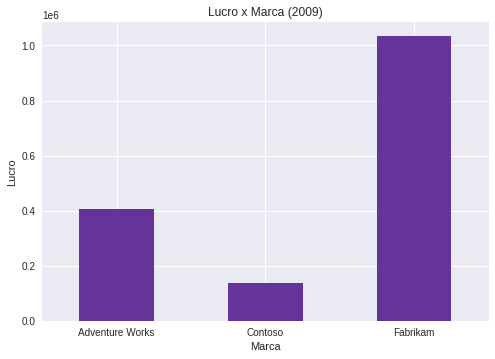

In [60]:
# Lucro por marca
df_2009.groupby("Marca")["Lucro Total"].sum().plot.bar(title = "Lucro x Marca (2009)", color = "rebeccapurple")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

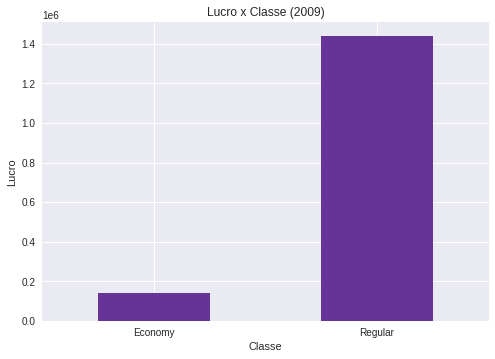

In [59]:
# Lucro por classe
df_2009.groupby("Classe")["Lucro Total"].sum().plot.bar(title = "Lucro x Classe (2009)", color = "rebeccapurple")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

## **Análises Estatísticas do Tempo de Envio**

In [48]:
# Tempo de envio
df["Tempo Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

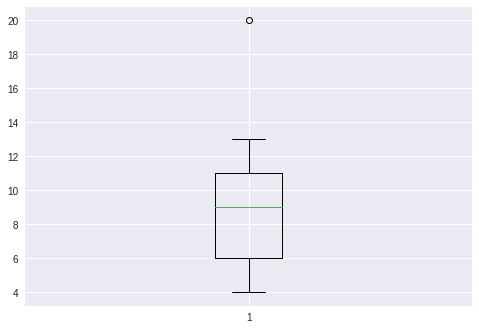

In [49]:
# Gráfico de Boxplot: mostra os quartis e valores min/max de forma gráfica
# Q1: 25%, Q2/Mediana: 50%, Q3: 75%
# O valor máximo (20) representa um outlier (valor atípico), ou seja, uma valor que está muito discrepante do padrão de comportamento da amosta.
# Por isso é representado como um ponto separado do restante da amostra.
# Um outlier pode significar um número que foi computado incorretamente ou então um número influente.
plt.boxplot(df["Tempo Envio"]);

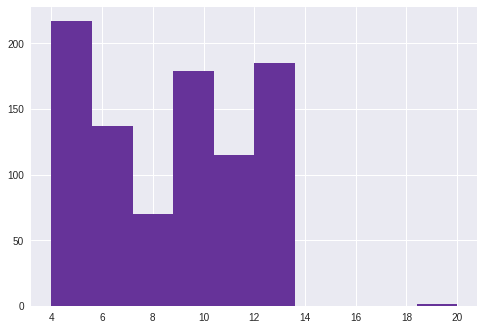

In [58]:
# Histograma
plt.hist(df["Tempo Envio"], color = "rebeccapurple");

In [51]:
# Tempo de envio mínimo
df["Tempo Envio"].min()

4

In [52]:
# Tempo de envio máximo
df["Tempo Envio"].max()

20

In [53]:
# Para consultar qual linha responsável pelo valor máximo
df[df["Tempo Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro Total,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [54]:
# Salvar um novo arquivo csv com os dados
# Index False para que o índice (0, 1, 2, 3, ...) não seja incluído no arquivo
df.to_csv("df_vendas_novo.csv", index=False)